<a href="https://colab.research.google.com/github/timlok123/PHYS3151-Machine-Learning-in-Physics-2025/blob/main/clustering/Ising_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means clustering

Now we make use of the data of $40\times 40$ system. Since it contain lots of spins, we only use 5000 sample here.

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
!git clone https://github.com/timlok123/PHYS3151-Machine-Learning-in-Physics-2025.git

Cloning into 'PHYS3151-Machine-Learning-in-Physics-2025'...
remote: Enumerating objects: 201, done.
remote: Counting objects: 100% (201/201), done.
remote: Compressing objects: 100% (191/191), done.
remote: Total 201 (delta 89), reused 62 (delta 8), pack-reused 0 (from 0)
Receiving objects: 100% (201/201), 29.45 MiB | 14.28 MiB/s, done.
Resolving deltas: 100% (89/89), done.


In [2]:
# spin configurations
df3 = pd.read_csv("/content/PHYS3151-Machine-Learning-in-Physics-2025/clustering/Ising_clustering_conf.csv",header=None)
# temperature
df4 = pd.read_csv("/content/PHYS3151-Machine-Learning-in-Physics-2025/clustering/Ising_clustering_temp.csv",header=None)
df3 = df3.to_numpy()
df4 = df4.to_numpy()
pc = df3
tc = df4
tc = tc.T
print(pc)
print(pc.shape)
print(tc.shape)

[[-7.74909122e-01  1.27143544e+00]
 [ 6.55223643e-01 -8.72356330e-01]
 [ 2.01012902e+01 -2.39105217e-02]
 ...
 [-1.97735808e+01  9.96617100e-04]
 [-1.98982500e+01 -4.48367571e-02]
 [ 4.79632658e-01 -7.53841224e-01]]
(5000, 2)
(1, 5000)


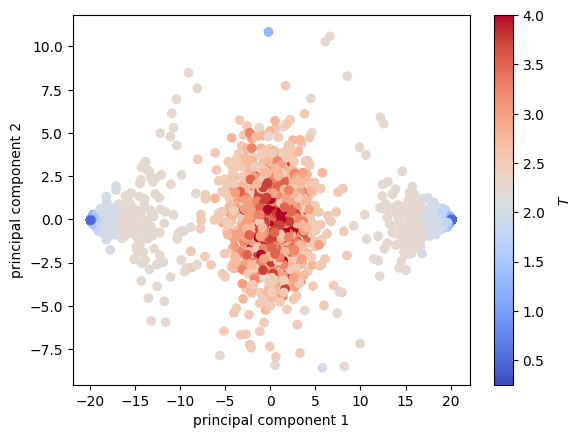

In [3]:
plt.scatter(pc[:,0],pc[:,1],c=tc,cmap="coolwarm")
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
cb = plt.colorbar()
cb.set_label(label='$T$',labelpad=10)
plt.show()

## K-means

Obviously, these data can be split into 3 clusters. Let's do K-means method step by step.

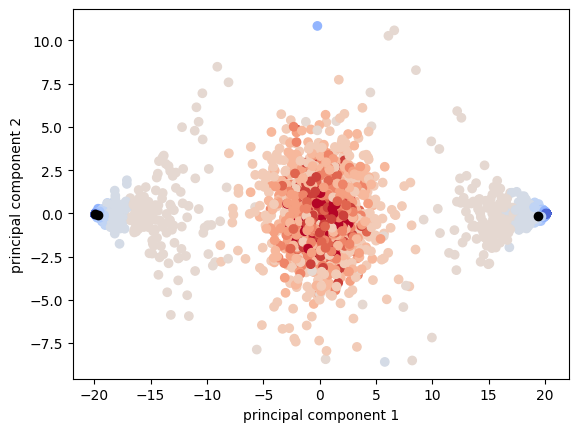

In [4]:
import random
K=3
a = random.sample(range(0, len(pc)-1), K)
Centroids = np.zeros((K,2))
#print(a)
for i in range(K):
  Centroids[i,0] = pc[a[i],0]
  Centroids[i,1] = pc[a[i],1]
plt.scatter(pc[:,0],pc[:,1],c=tc,cmap="coolwarm")
plt.scatter(Centroids[:,0],Centroids[:,1],c='black')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.show()

In [5]:
pc = pc.tolist()
Centroids = Centroids.tolist()
principalComponents = pd.DataFrame(pc)
Centroids = pd.DataFrame(Centroids)
print(principalComponents)
print(Centroids)

              0         1
0     -0.774909  1.271435
1      0.655224 -0.872356
2     20.101290 -0.023911
3    -19.898250 -0.044837
4    -19.898250 -0.044837
...         ...       ...
4995 -19.898250 -0.044837
4996   1.052938 -0.329986
4997 -19.773581  0.000997
4998 -19.898250 -0.044837
4999   0.479633 -0.753841

[5000 rows x 2 columns]
           0         1
0 -19.898250 -0.044837
1 -19.623997 -0.109352
2  19.326976 -0.136150


In [6]:
def K_mean(pc,K=3,jmax=10):
# step 1 - choose 3 clusters at random
# step 2 - select random point as centroids
    a = random.sample(range(0, len(pc)-1), K)
    Centroids = np.zeros((K,2))
    #print(a)
    for i in range(K):
      Centroids[i,0] = pc[a[i]][0]
      Centroids[i,1] = pc[a[i]][1]
    diff = 1
    j = 0
    Centroids = pd.DataFrame(Centroids)
    Centroids.columns = ['pc1','pc2']
    principalComponents = pd.DataFrame(pc)
    principalComponents.columns = ['pc1','pc2']
    while (diff!=0):
        XD = principalComponents
        i = 1
# step 3 - assign all the points to the closest cluster centroid
        for index1,row_c in Centroids.iterrows():
            ED = []
            for index2,row_d in XD.iterrows():
                d1 = (row_c["pc1"] - row_d["pc1"])**2
                d2 = (row_c["pc2"] - row_d["pc2"])**2
                d = np.sqrt(d1+d2)
                ED.append(d)
            principalComponents[i] = ED
            i = i + 1

        C=[]
        for index,row in principalComponents.iterrows():
            min_dist = row[1]
            pos = 1
            for i in range(K):
                if row[i+1] < min_dist:
                    min_dist = row[i+1]
                    pos = i + 1
            C.append(pos)
        principalComponents["Cluster"]=C
# step 4 - recomput centroids of newly formed clusters
        Centroids_new = principalComponents.groupby(["Cluster"]).mean()[["pc2","pc1"]]
# step 5 - repeat 3 and 4
        if j == 0:
            diff = 1
            j = j+1
        elif j<jmax:
            diff = ((Centroids_new['pc2'] - Centroids['pc2'])**2).sum() + ((Centroids_new['pc1'] - Centroids['pc1'])**2).sum()
            print(diff.sum())
            j = j+1
        else:
          diff = ((Centroids_new['pc2'] - Centroids['pc2'])**2).sum() + ((Centroids_new['pc1'] - Centroids['pc1'])**2).sum()
          print('force exit with diff=', diff.sum())
          diff=0
        Centroids = principalComponents.groupby(["Cluster"]).mean()[["pc2","pc1"]]
    return principalComponents, Centroids

In [7]:
principalComponents, Centroids=K_mean(pc,3)

0.0018618119624111771
0.0


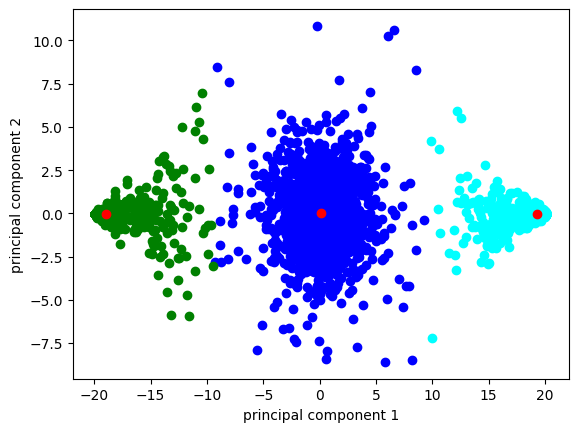

In [8]:
color=['blue','green','cyan']
for k in range(K):
    data=principalComponents[principalComponents["Cluster"]==k+1]
    plt.scatter(data["pc1"],data["pc2"],c=color[k])
plt.scatter(Centroids["pc1"],Centroids["pc2"],c='red')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.show()

## Elbow Method

We can use Elbow Method to verify that.

<br>We want a measurement for the clustering and here we define the distortion(distortion cost function):
<br>
$$
J=\frac{1}{m}\sum_{i=1}^m||x^{(i)}-\mu_{c^{i}}||^2
$$
<br>Choosing the number of clusters is of great importance. Here we introduce Elbow method, which is to vary K and compute cost function at a range of K values. And while the cost_function decrease, we choose the elbow point in the plot as K. Note, it can happen that you don't get a a nice line -> no clear elbow on curve.

In [9]:
print(principalComponents)

            pc1       pc2          1          2          3  Cluster
0     -0.774909  1.271435   1.508689  18.255800  20.080506        1
1      0.655224 -0.872356   1.071027  19.656509  18.625936        1
2     20.101290 -0.023911  19.991524  39.084907   0.838854        3
3    -19.898250 -0.044837  20.008373   0.914655  39.160873        2
4    -19.898250 -0.044837  20.008373   0.914655  39.160873        2
...         ...       ...        ...        ...        ...      ...
4995 -19.898250 -0.044837  20.008373   0.914655  39.160873        2
4996   1.052938 -0.329986   1.016508  20.038664  18.211968        1
4997 -19.773581  0.000997  19.883541   0.790981  39.036227        2
4998 -19.898250 -0.044837  20.008373   0.914655  39.160873        2
4999   0.479633 -0.753841   0.884293  19.476368  18.796490        1

[5000 rows x 6 columns]


In [10]:
Kn=[]
distortions=[]
for i in range(2,7):
    Kn.append(i)
    principalComponents=K_mean(pc,i)[0]
    data=np.array(principalComponents)[:,2:2+i]
    data=np.min(data,axis=1)
    distortions.append(data.sum()/len(data))

0.016975410688044323
0.0008939662429240106
0.0
0.0005764361098197219
0.0
0.44990935936945764
0.19046381919469352
0.11438451361427145
0.031057098724067898
0.01544789776957977
0.011062946539816088
0.0034881180602618802
0.0014726454604203224
0.0
3.296165765343445
1.7066245994948128
1.1014627838722713
0.13811587728740776
0.037746229224802974
0.016371091709596653
0.017114238264482665
0.018835796977118718
0.02131050088991153
force exit with diff= 0.010315435594205842
0.9283690191239202
1.3537848059522715
2.964147410241108
3.7817974375075094
1.8606416980456646
0.8410202354158609
0.4151431883770947
0.2523162919997854
0.11733221213728869
force exit with diff= 0.11396726544607638


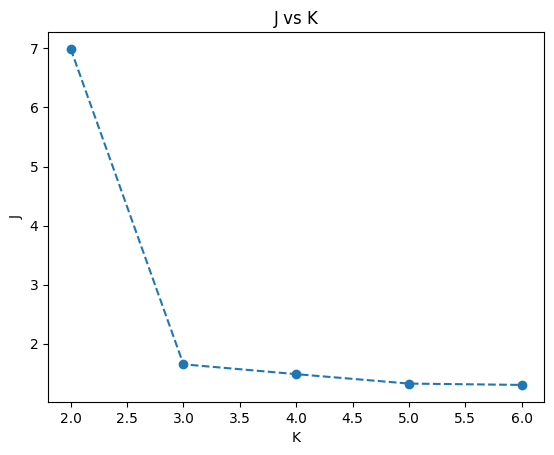

In [11]:
plt.plot(Kn,distortions,ls='--',marker='o')
plt.xlabel('K')
plt.ylabel('J')
plt.title('J vs K')
plt.show()

This result shows that the data should best be split into 3 clusters, which is much better than the case of 4 cluster, just as what we our figures ploted before this measure showed.

Finally, we apply the KMeans function from the sklearn package and then show the results in the figure below.

centers are: [[-18.98361362  -0.03903064]
 [  0.10990103   0.04944743]
 [ 19.26262276  -0.04158764]]


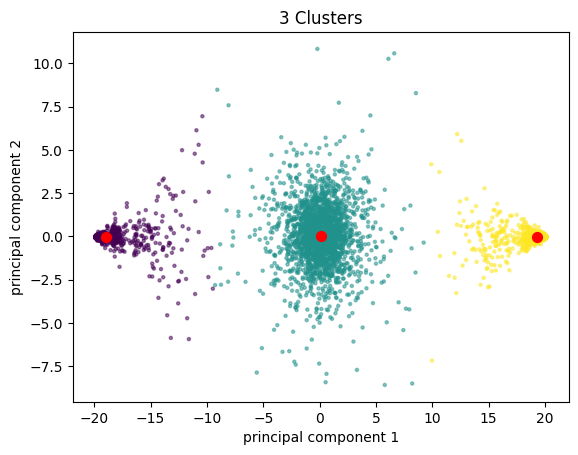

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3).fit(pc)
centroids = kmeans.cluster_centers_
print('centers are:',centroids)

fig= plt.figure()
x =np.array(pc)[:,0]
y =np.array(pc)[:,1]

plt.scatter(x, y, c= kmeans.labels_.astype(float),s=5, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50, alpha=1)
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.title('3 Clusters')

plt.show()